# Benchmark


In [ ]:
import numpy as np

from pepme.core import (
    SequenceCache,
    barplot,
    compute_metrics,
    random_subset,
    show_table,
)
from pepme.metrics.fid import FID
from pepme.metrics.gravy import Gravy
from pepme.metrics.novelty import Novelty
from pepme.utils import read_fasta_file

Let's load the datasets.


In [ ]:
DATASET_PATHS = {
    "AMP-diffusion": "../data/amp-diffusion.fasta",
    "AMP-GAN": "../data/amp-gan.fasta",
    "CPL-Diff": "../data/cpl-diff.fasta",
    "HydrAMP": "../data/hydramp.fasta",
    "OmegAMP": "../data/omegAMP/omegamp.fasta",
    # "Diff-AMP": "../data/diff-amp.fasta",
}

In [ ]:
datasets = {name: read_fasta_file(path) for name, path in DATASET_PATHS.items()}

In [ ]:
for model_name, sequences in datasets.items():
    print(f"{model_name}: {len(sequences)} sequences")

AMP-diffusion: 47671 sequences
AMP-GAN: 150000 sequences
CPL-Diff: 49985 sequences
HydrAMP: 50000 sequences
OmegAMP: 149504 sequences


Let's define the metrics.


In [ ]:
n_samples = 40_000
seed = 42

benchmark_datasets = {
    name: random_subset(sequences, n_samples=n_samples, seed=seed)
    for name, sequences in datasets.items()
}


# @TODO: replace with ESM2 when implemented
def my_embedder(sequences: list[str]) -> np.ndarray:
    lengths = [len(sequence) for sequence in sequences]
    counts = [sequence.count("K") for sequence in sequences]
    return np.array([lengths, counts]).T


cache = SequenceCache(models={"embedder": my_embedder})

metrics = [
    Novelty(reference=benchmark_datasets["HydrAMP"], reference_name="HydrAMP"),
    FID(reference=benchmark_datasets["HydrAMP"], embedder=cache.model("embedder")),
    Gravy(),
]

In [ ]:
df = compute_metrics(benchmark_datasets, metrics)

100%|██████████| 15/15 [00:02<00:00,  6.67it/s, data=OmegAMP, metric=Gravy]            


Let's look at the results.


In [ ]:
show_table(df, decimals=2)

,Novelty (HydrAMP)↑,FID↓,Gravy
AMP-diffusion,1.00,82.15,-0.01±0.04
AMP-GAN,1.00,16.73,-0.00±0.17
CPL-Diff,1.00,46.28,-0.01±0.11
HydrAMP,0.00,0.00,-0.02±0.06
OmegAMP,1.00,62.41,-0.03±0.14


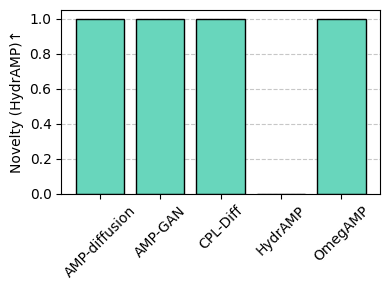

In [ ]:
barplot(df, "Novelty (HydrAMP)")